In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [11]:
dV = 0.1
dT = 2

def get_data(filename):
    data_raw = open(filename, "r").readlines()
    temps = []
    volts = []
    volts_fresh = []
    sides = []
    for i, element in enumerate(data_raw):
        element.strip()
        if i<4:
            temps.append(int(element.split(";")[1]))
        string = (element.split(";")[2][:-1]).replace(",",".")
        volts_fresh.append(float(string))
        if (i+1)%4 == 0:
            sides.append(element.split(";")[0])
            volts.append(volts_fresh)
            volts_fresh = []
    return volts, temps, sides
        
def calc_a(temps,volts,n):
    alfas = []
    for i, temp in enumerate(temps):
        alfa = (volts[n][i])/(temp)**4
        alfas.append(alfa)
    return sum(alfas)/len(alfas), alfas

def alfa_anal_err(volts,temps,alfas,n):
    errs = []
    for i, temp in enumerate(temps):
        volt = volts[n][i]
        alfa = (volt)/(temp)**4
        err = np.sqrt((dV/volt)**2+(4*dT/temp)**2)*alfa
        errs.append(err)
    alfa_max = sum(np.array(alfas)+np.array(errs))/len(np.array(alfas)+np.array(errs))
    alfa_min = sum(np.array(alfas)-np.array(errs))/len(np.array(alfas)-np.array(errs))
    return alfa_max, alfa_min

def rel_volts_black(volts, n):
    rel_volts = []
    for i, volt in enumerate(volts[0]):
        rel_volts.append(volts[n][i]/volt)
    return rel_volts
    
volts, temps, sides = get_data("Leslie_data1.csv")

<IPython.core.display.Javascript object>


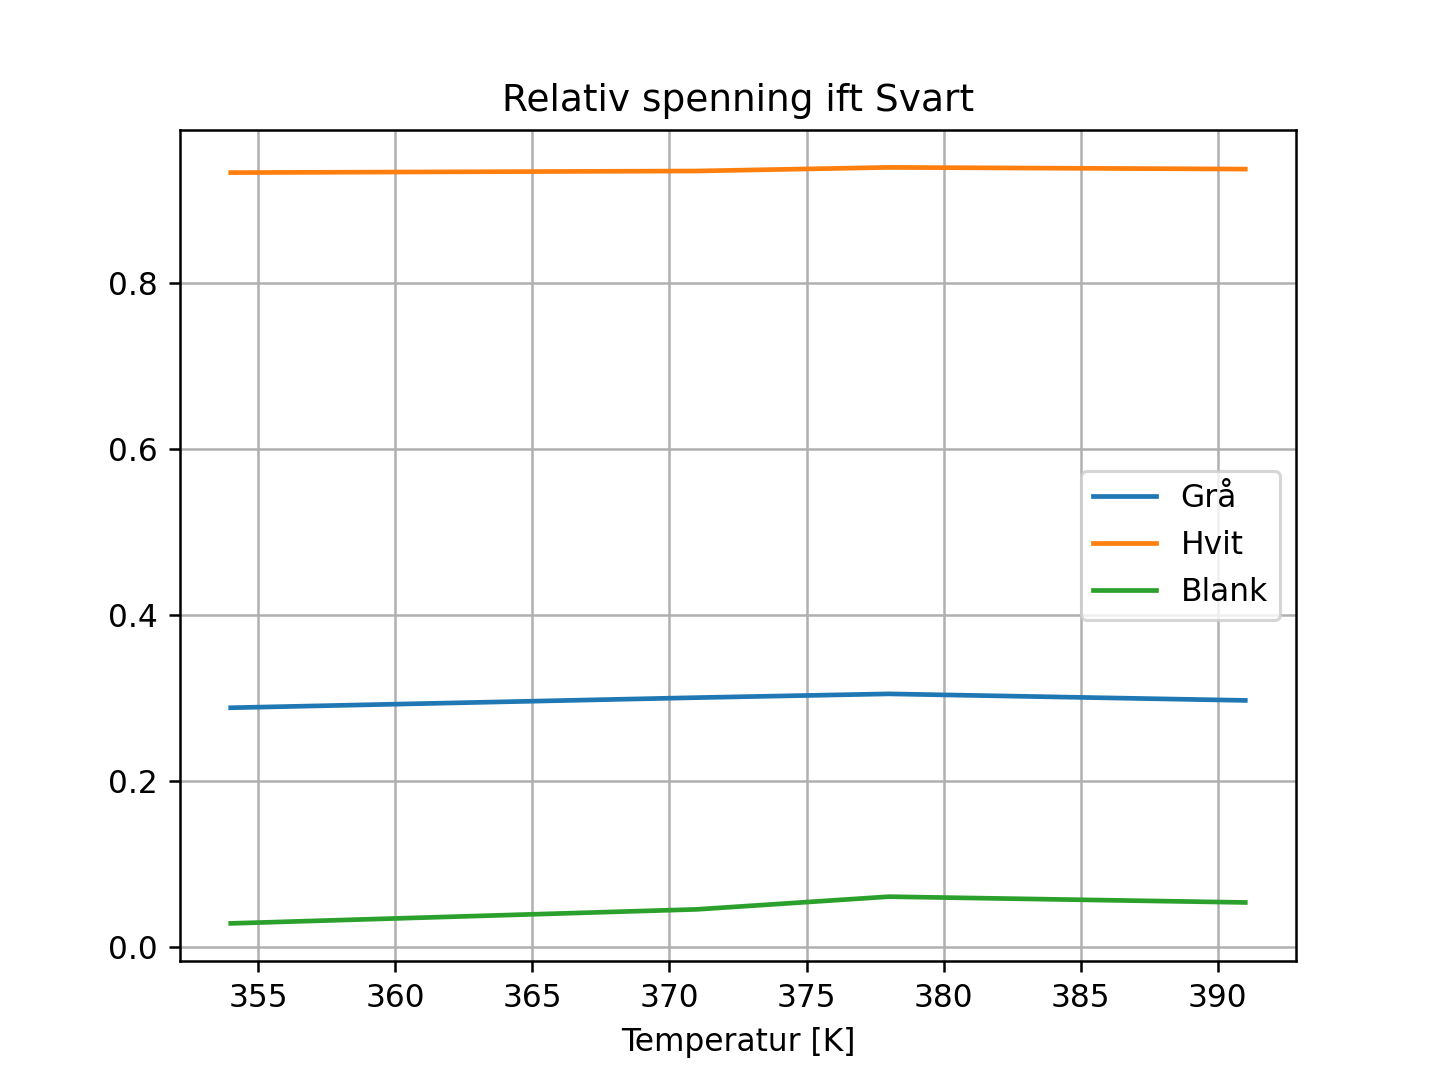

[0.28846153846153844, 0.3006535947712418, 0.30516431924882625, 0.2972972972972973]
[0.9326923076923076, 0.934640522875817, 0.9389671361502347, 0.936936936936937]
[0.028846153846153844, 0.0457516339869281, 0.06103286384976526, 0.05405405405405406]


In [16]:
fig0 = plt.figure()
plt.plot(temps,rel_volts_black(volts,1))
plt.plot(temps,rel_volts_black(volts,2))
plt.plot(temps,rel_volts_black(volts,3))
plt.grid()
plt.xlabel("Temperatur [K]")
plt.title("Relativ spenning ift Svart")

x = np.linspace(354,391,100)

plt.legend(sides[1:])
for i in range(3):
    print(rel_volts_black(volts,i+1))

<IPython.core.display.Javascript object>


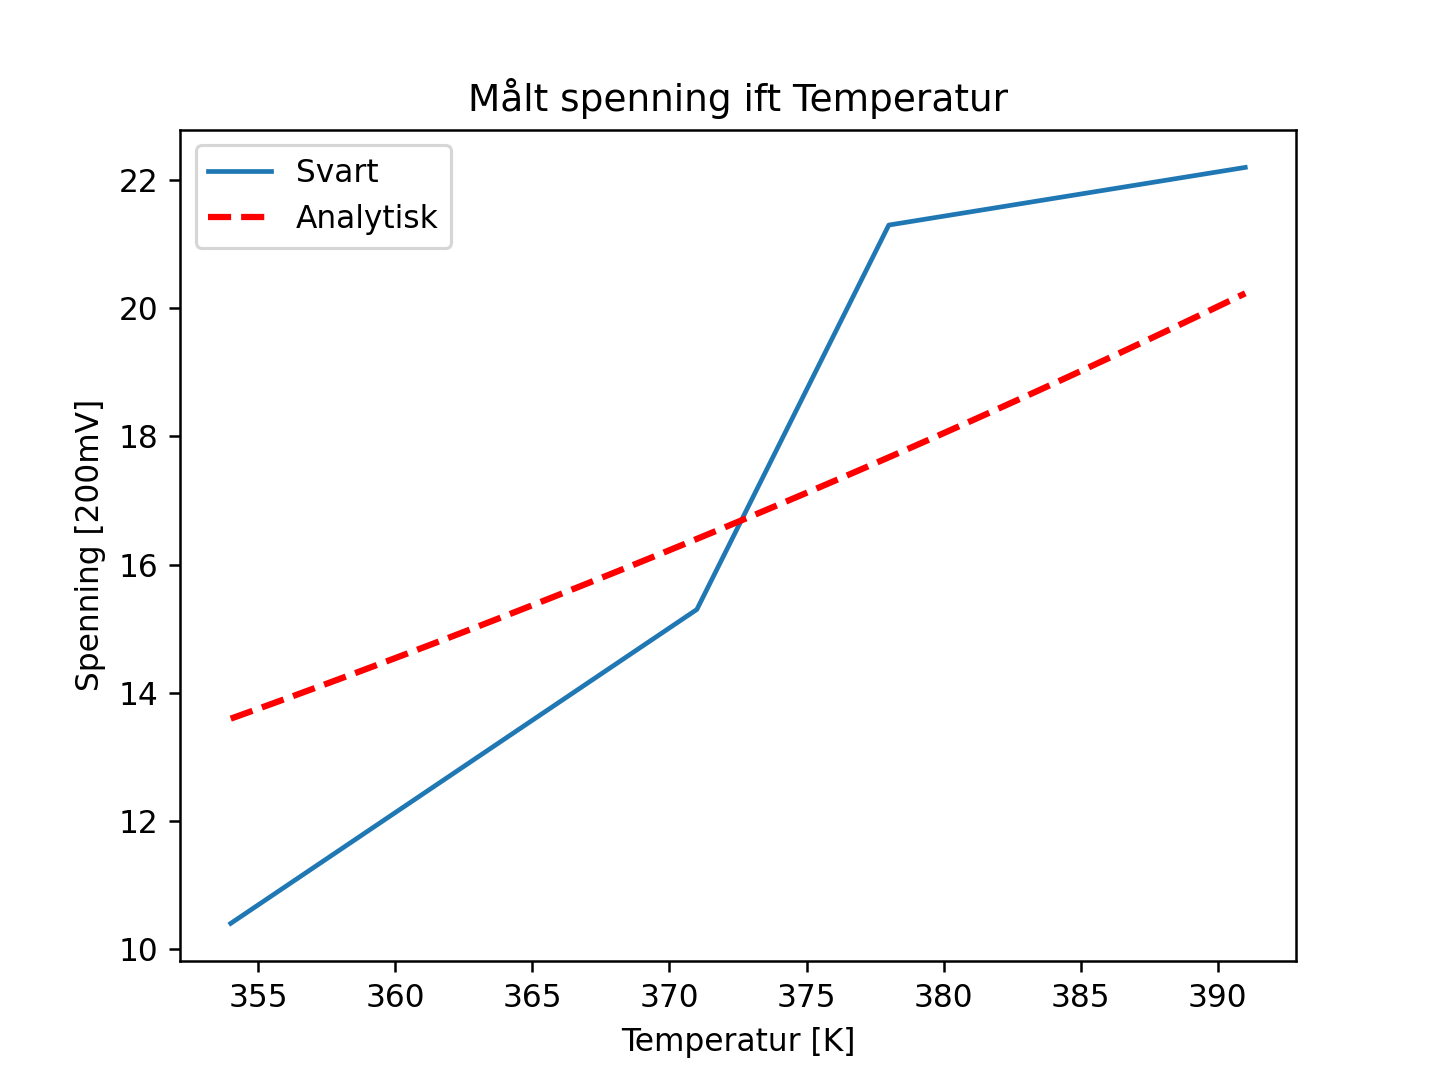

In [10]:
fig1 = plt.figure()
plt.plot(temps,volts[0])
plt.xlabel("Temperatur [K]")
plt.ylabel("Spenning [200mV]")
plt.title("Målt spenning ift Temperatur")

alfa = calc_a(temps,volts,0)[0]
x = np.linspace(354,391,100)
plt.plot(x,alfa*x**4,"r--", linewidth = 2)

plt.legend([sides[0], "Analytisk"])

<IPython.core.display.Javascript object>


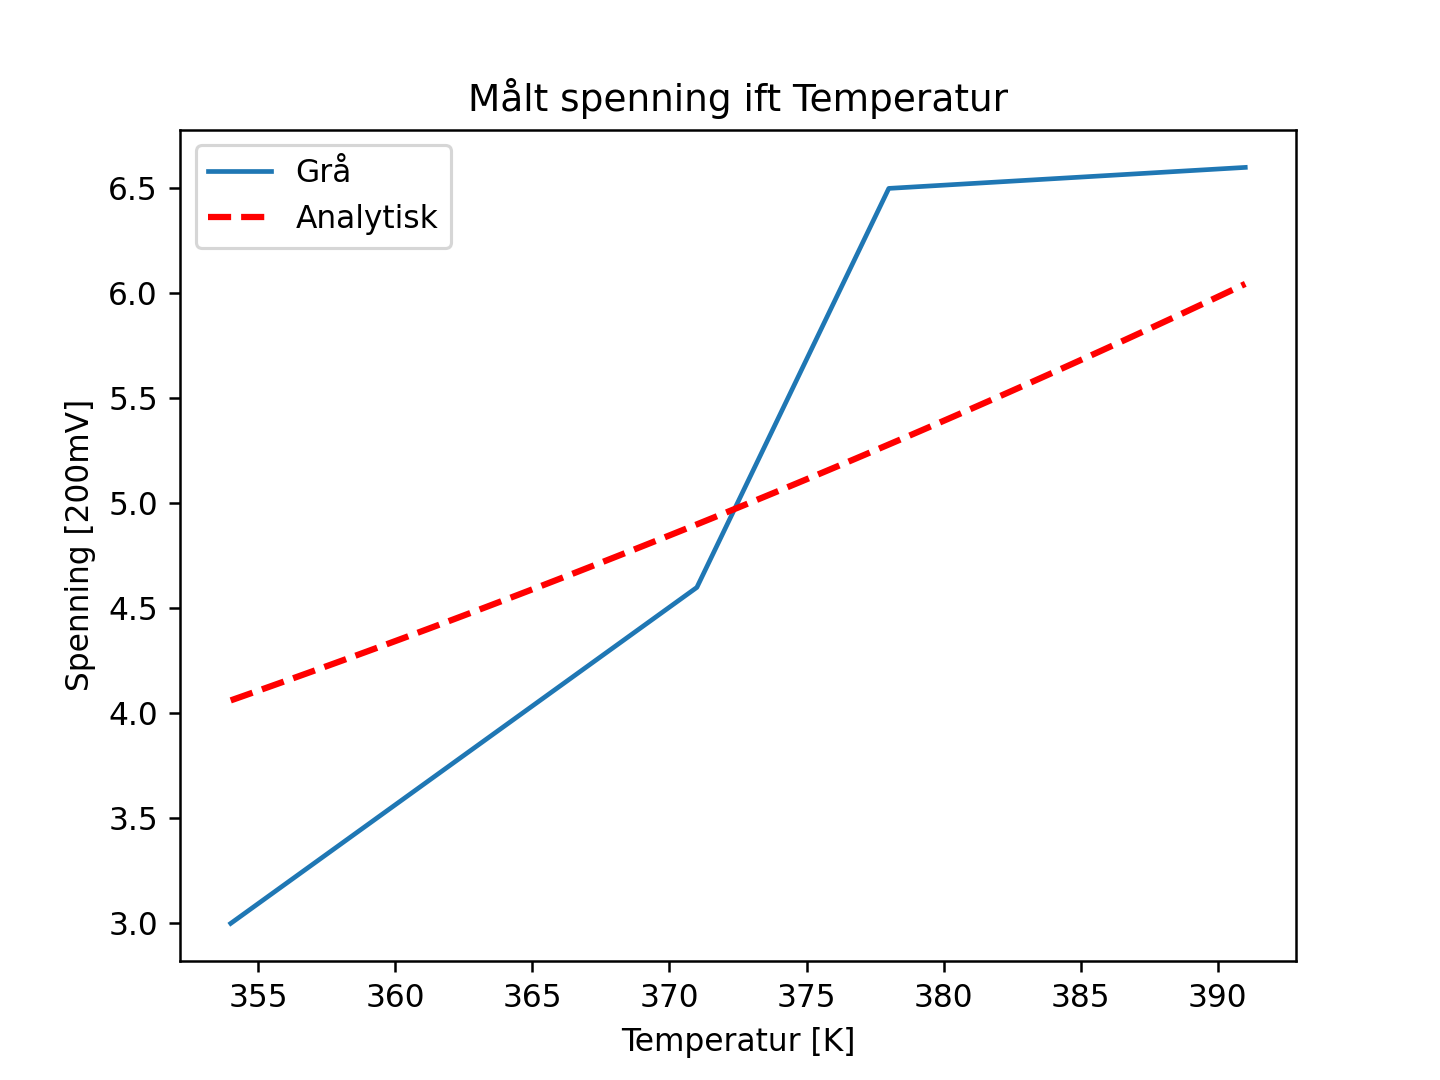

In [4]:
fig2 = plt.figure()
plt.plot(temps,volts[1])
plt.xlabel("Temperatur [K]")
plt.ylabel("Spenning [200mV]")
plt.title("Målt spenning ift Temperatur")

alfa = calc_a(temps,volts,1)[0]
x = np.linspace(354,391,100)
plt.plot(x,alfa*x**4,"r--", linewidth = 2)

plt.legend([sides[1], "Analytisk"])

<IPython.core.display.Javascript object>


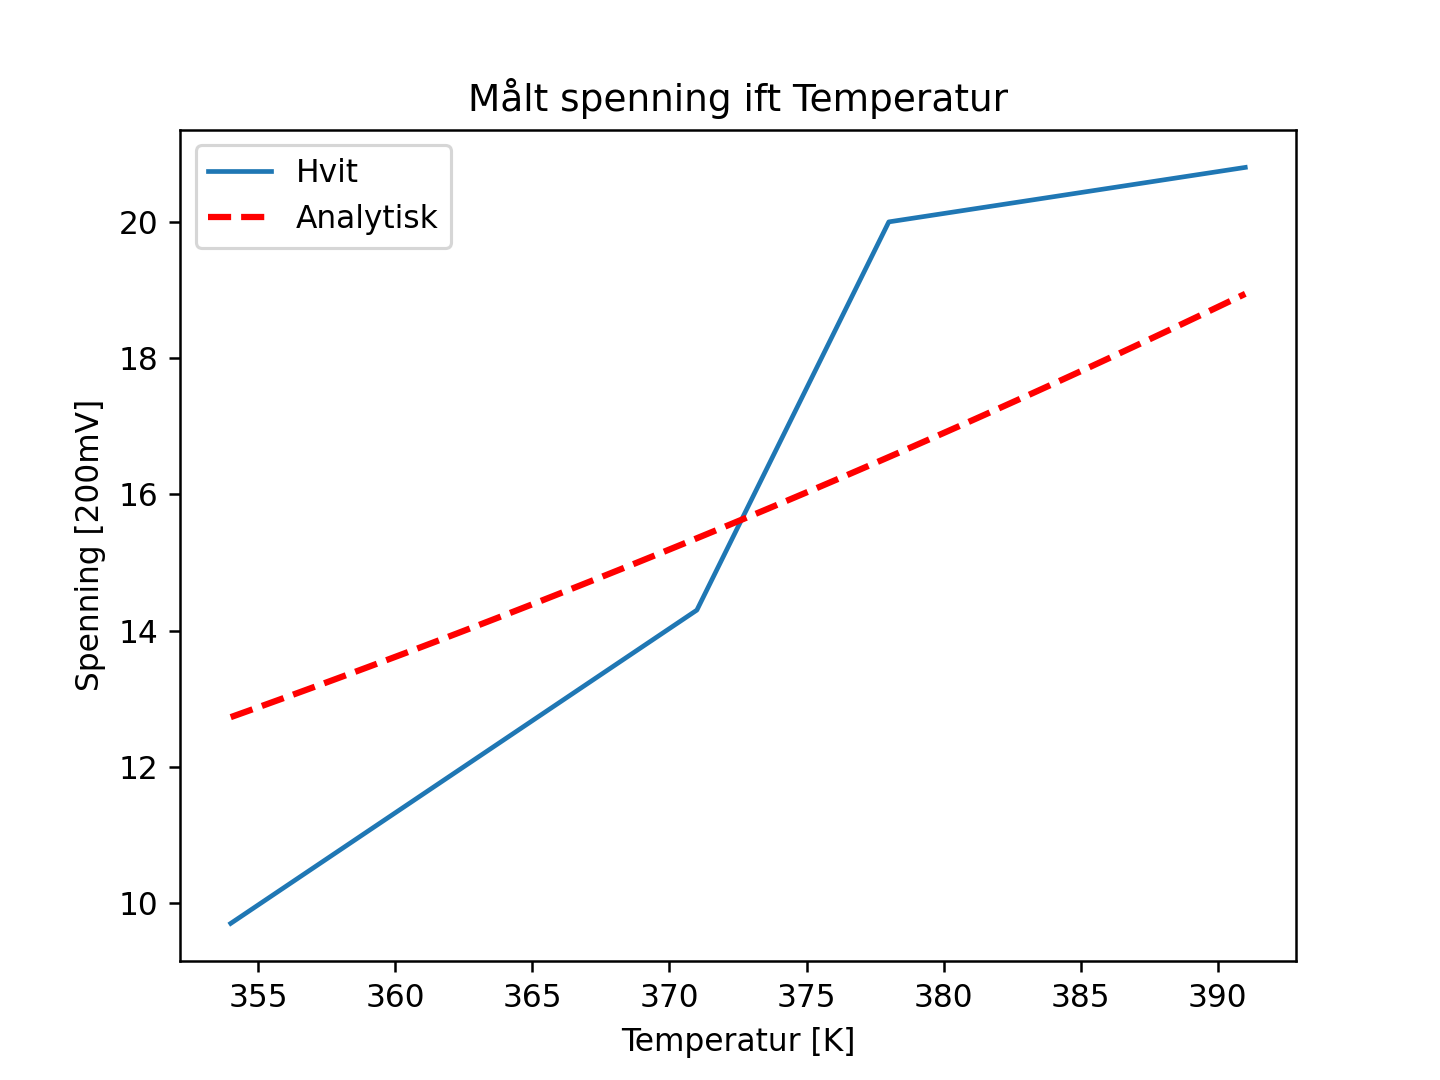

In [5]:
fig3 = plt.figure()
plt.plot(temps,volts[2])
plt.xlabel("Temperatur [K]")
plt.ylabel("Spenning [200mV]")
plt.title("Målt spenning ift Temperatur")

alfa = calc_a(temps,volts,2)[0]
x = np.linspace(354,391,100)
plt.plot(x,alfa*x**4,"r--", linewidth = 2)

plt.legend([sides[2], "Analytisk"])

<IPython.core.display.Javascript object>


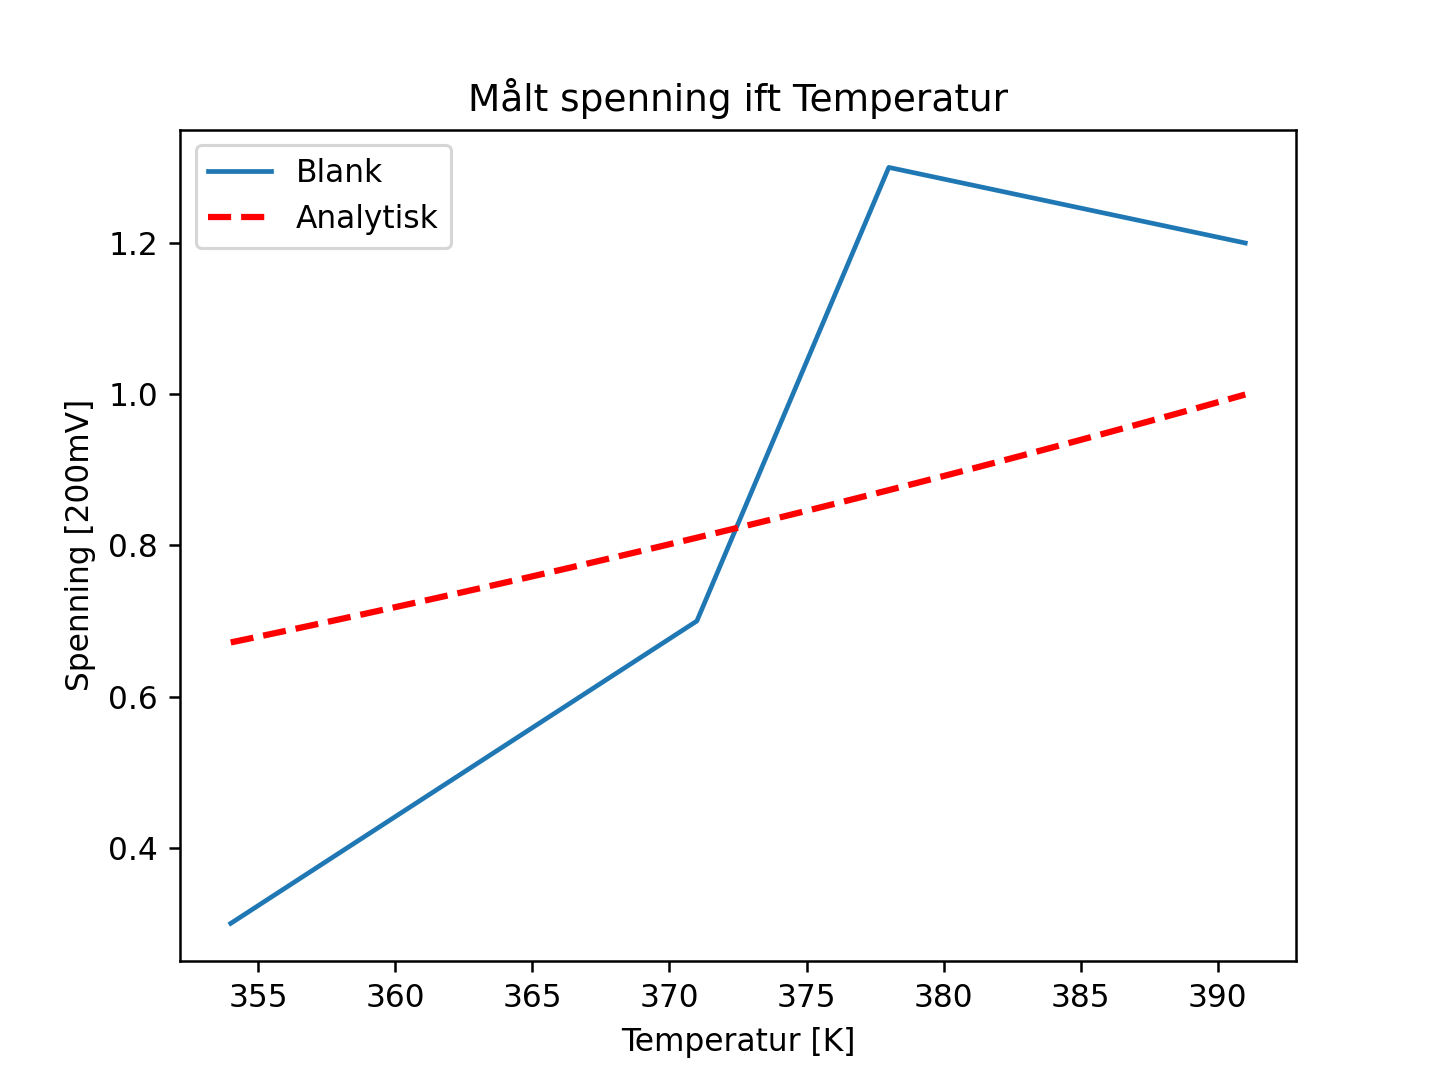

4.276762307676123e-11


In [6]:
fig4 = plt.figure()
plt.plot(temps,volts[3])
plt.xlabel("Temperatur [K]")
plt.ylabel("Spenning [200mV]")
plt.title("Målt spenning ift Temperatur")

alfa = calc_a(temps,volts,3)[0]
x = np.linspace(354,391,100)
plt.plot(x,alfa*x**4,"r--", linewidth = 2)
print(alfa)

plt.legend([sides[3], "Analytisk"])

<IPython.core.display.Javascript object>


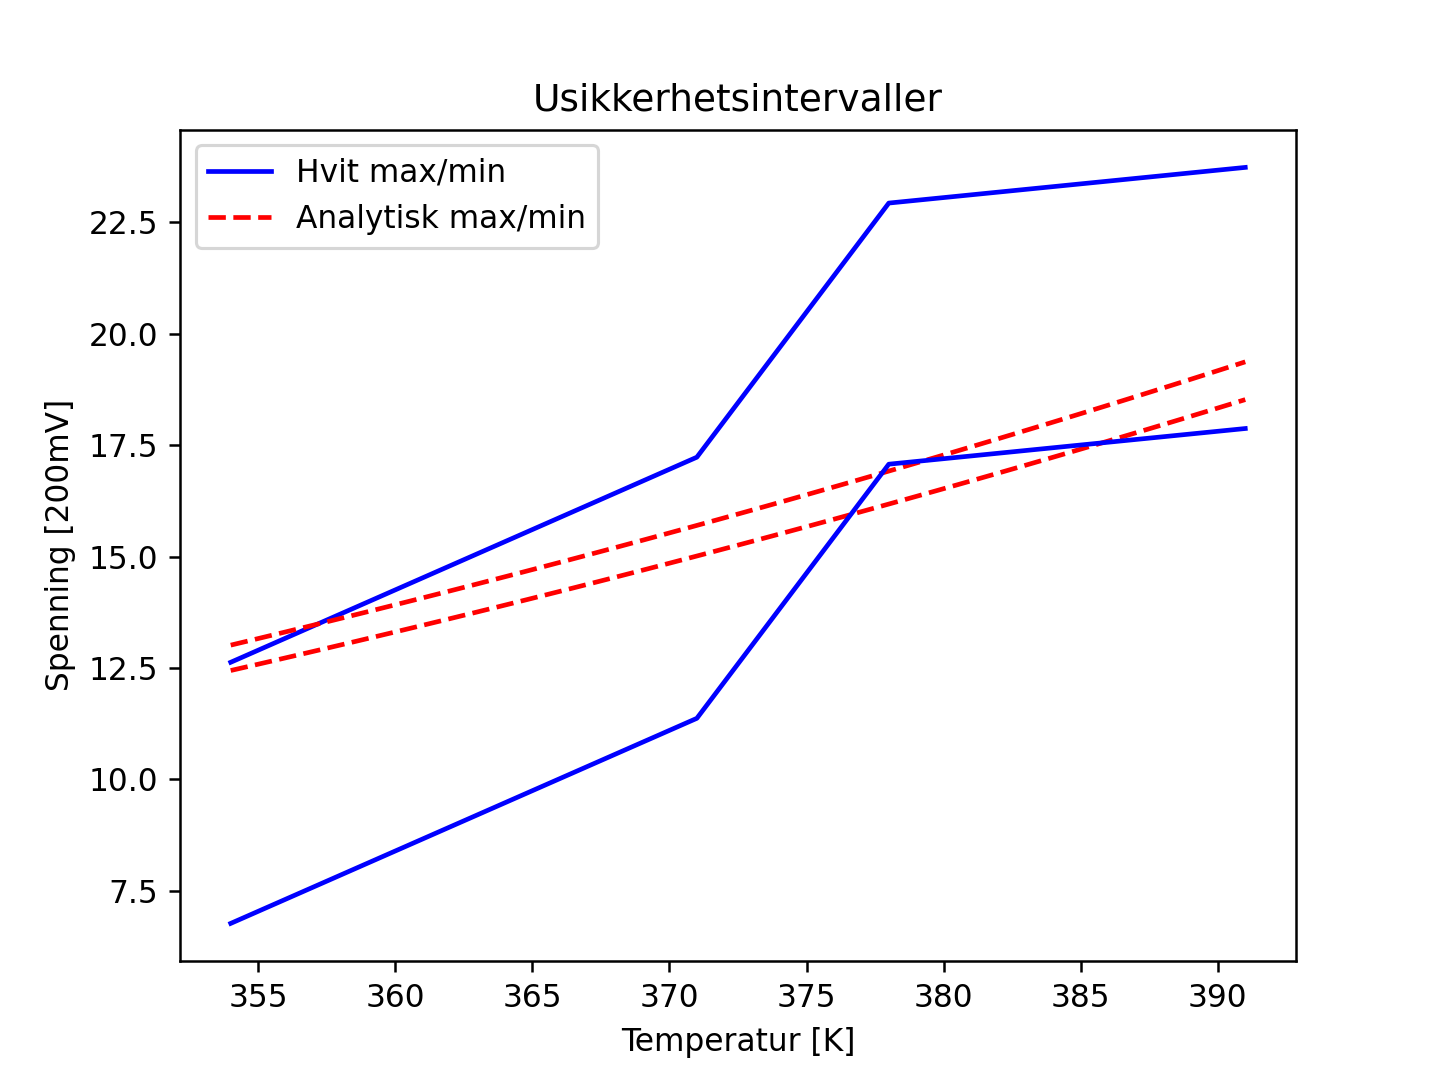

In [7]:
fig5 = plt.figure()

exp_err = dV + 2*np.sqrt(dT)

plt.xlabel("Temperatur [K]")
plt.ylabel("Spenning [200mV]")
plt.title("Usikkerhetsintervaller")

alfa, alfas = calc_a(temps,volts,2)
alfa_max, alfa_min = alfa_anal_err(volts,temps,alfas,2)
x = np.linspace(354,391,100)

plt.plot(temps,np.array(volts[2])+exp_err,"b")
plt.plot(x,alfa_max*x**4,"r--")
plt.plot(x,alfa_min*x**4,"r--")
plt.plot(temps,np.array(volts[2])-exp_err,"b")

plt.legend([sides[2] + " max/min", "Analytisk max/min"])